## Using a simple convolutional neural network

In [1]:
%matplotlib inline
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from __future__ import print_function
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# get MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# input image dimensions
img_rows, img_cols = 28, 28

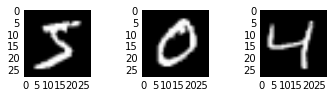

In [3]:
# display a few training images
plt.subplot(331)
plt.imshow(x_train[0].reshape(img_rows,img_cols), cmap=plt.get_cmap('gray'))
plt.subplot(332)
plt.imshow(x_train[1].reshape(img_rows,img_cols), cmap=plt.get_cmap('gray'))
plt.subplot(333)
plt.imshow(x_train[2].reshape(img_rows,img_cols), cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [4]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows,img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows,img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows,img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows,img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
# convert to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# rescale
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [5]:
# one-hot encode the y integer vectors into binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 282s - loss: 0.3489 - acc: 0.8946 - val_loss: 0.0909 - val_acc: 0.9711
Epoch 2/15
60000/60000 [==============================] - 266s - loss: 0.1175 - acc: 0.9656 - val_loss: 0.0545 - val_acc: 0.9826
Epoch 3/15
60000/60000 [==============================] - 270s - loss: 0.0862 - acc: 0.9745 - val_loss: 0.0444 - val_acc: 0.9854
Epoch 4/15
60000/60000 [==============================] - 275s - loss: 0.0739 - acc: 0.9789 - val_loss: 0.0399 - val_acc: 0.9866
Epoch 5/15
60000/60000 [==============================] - 292s - loss: 0.0637 - acc: 0.9811 - val_loss: 0.0390 - val_acc: 0.9866
Epoch 6/15
60000/60000 [==============================] - 275s - loss: 0.0570 - acc: 0.9829 - val_loss: 0.0318 - val_acc: 0.9898
Epoch 7/15
60000/60000 [==============================] - 269s - loss: 0.0506 - acc: 0.9852 - val_loss: 0.0314 - val_acc: 0.9895
Epoch 8/15
60000/60000 [=======================

dict_keys(['loss', 'val_loss', 'acc', 'val_acc'])


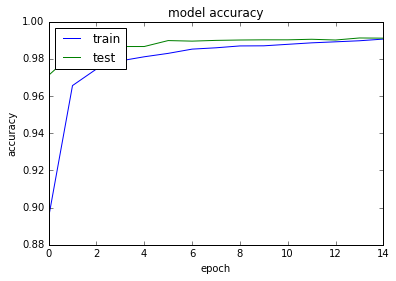

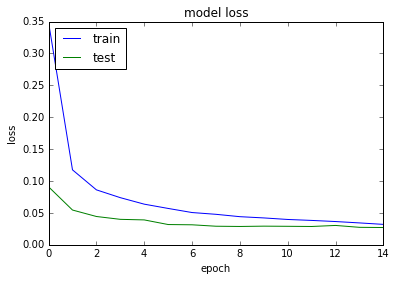

In [10]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0270898728568
Test accuracy: 0.9911


In [12]:
classes = model.predict_classes(x_test, batch_size=1)
print(classes)

 9988/10000 [============================>.] - ETA: 0s[7 2 1 ..., 4 5 6]


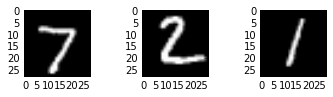

In [13]:
# display a few test images
plt.subplot(331)
plt.imshow(x_test[0].reshape(img_rows,img_cols), cmap=plt.get_cmap('gray'))
plt.subplot(332)
plt.imshow(x_test[1].reshape(img_rows,img_cols), cmap=plt.get_cmap('gray'))
plt.subplot(333)
plt.imshow(x_test[2].reshape(img_rows,img_cols), cmap=plt.get_cmap('gray'))
# show the plot
plt.show()